In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.colors import LinearSegmentedColormap
import TestingTrainingSplit

# Create Custom Color Map
colors = np.array([(22,98,248), (48,141,250), (71,172,251), (100,201,252), (129,222,253),(162,240,254), (215,249,253), (255,255,255), 
                   (255,255,255), (255,249,217), (247,236,155), (254,221,128), (254,202,100), (255,173,71), (252,142,42), (255,101,15)])/255
custom_cmap = LinearSegmentedColormap.from_list('cmap', colors)

TraingPredictorData, TrainingTargetData, TestingPredictorData, TestingTargetData = TestingTrainingSplit.training_testing_split()

In [6]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

pls2 = PLSRegression(n_components=20)
pls_model = pls2.fit(TraingPredictorData, TrainingTargetData)
Y_pred = pls2.predict(TestingPredictorData)

Text(0.5, 1.0, 'R^2 = 0.849')

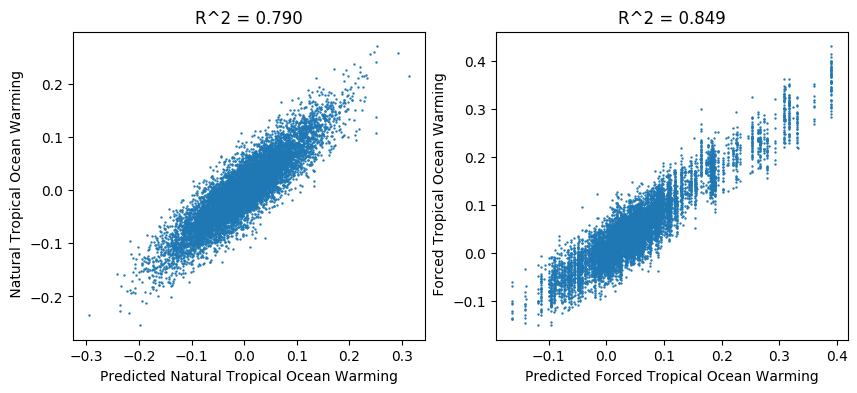

In [7]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,1], Y_pred[:,1], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Ocean Warming')
axs[0].set_ylabel(' Natural Tropical Ocean Warming')
R2 = stats.pearsonr(TestingTargetData[:,1], Y_pred[:,1])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,4], Y_pred[:,4], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Ocean Warming')
axs[1].set_ylabel(' Forced Tropical Ocean Warming')
R2 = stats.pearsonr(TestingTargetData[:,4], Y_pred[:,4])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

Text(0.5, 1.0, 'R^2 = 0.810')

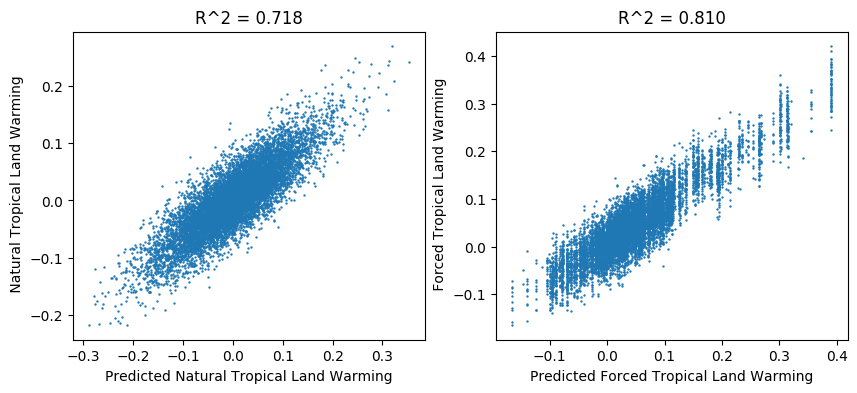

In [4]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,2], Y_pred[:,2], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Land Warming')
axs[0].set_ylabel(' Natural Tropical Land Warming')
R2 = stats.pearsonr(TestingTargetData[:,2], Y_pred[:,2])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,5], Y_pred[:,5], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Land Warming')
axs[1].set_ylabel(' Forced Tropical Land Warming')
R2 = stats.pearsonr(TestingTargetData[:,5], Y_pred[:,5])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

Text(0.5, 1.0, 'R^2 = 0.816')

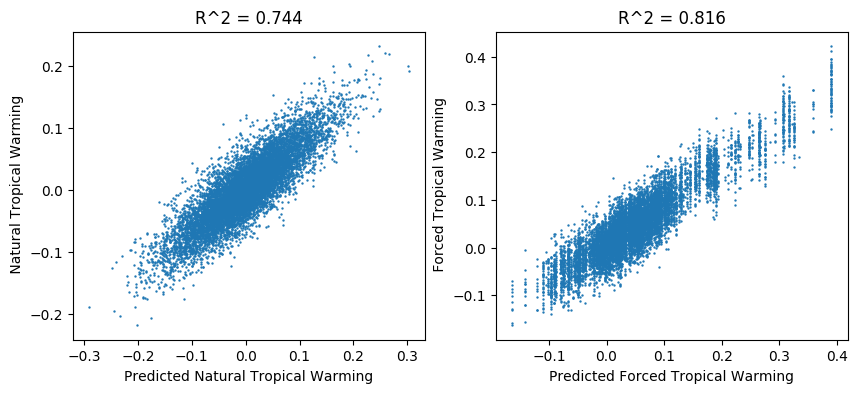

In [5]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,0], Y_pred[:,0], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Warming')
axs[0].set_ylabel(' Natural Tropical Warming')
R2 = stats.pearsonr(TestingTargetData[:,0], Y_pred[:,0])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,3], Y_pred[:,3], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Warming')
axs[1].set_ylabel(' Forced Tropical Warming')
R2 = stats.pearsonr(TestingTargetData[:,3], Y_pred[:,3])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

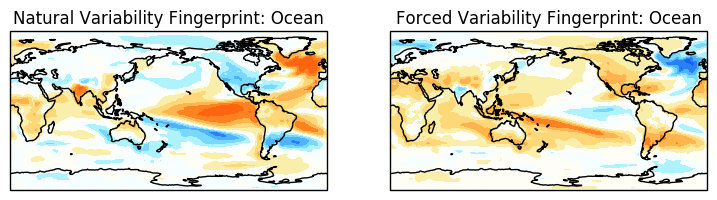

In [124]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Ocean')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,1], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Ocean')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,4], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)




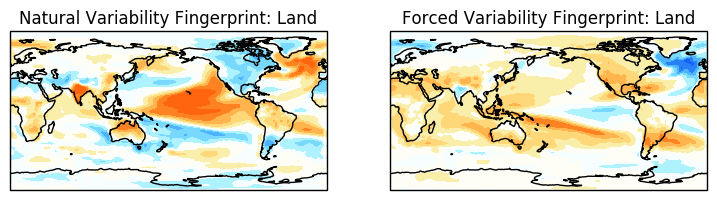

In [125]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Land')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,2], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Land')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,5], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)




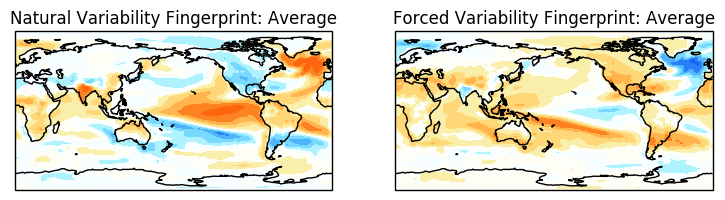

In [126]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Average')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,0], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Average')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,3], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)


